(2540.0, 2580.0)

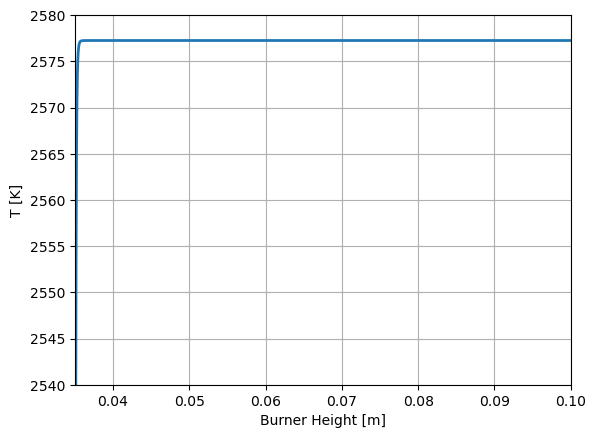

In [3]:
import cantera as ct
import timeit
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas as pd
import csv
import glob
import os

mech = 'H2_new_mech.yaml' # without NOx
#mech = 'Konnov_Han2021_dup_repairedfN2.yaml' # including NOx
'''
Han, Xinlu, Marco Lubrano Lavadera, and Alexander A. Konnov. 
"An experimental and kinetic modeling study on the laminar burning velocity of NH3+ N2O+ air flames." 
Combustion and Flame 228 (2021): 13-28.
'''

gas = ct.Solution(mech)

# Simulation parameters
Pressure = 15*ct.one_atm   # pressure [Pa]
Temperature = 500     # unburned gas temperature [K]   
phi = 1.0         # Equivalence ratio

# Solution
gas.TP = Temperature, Pressure
gas.set_equivalence_ratio(phi, 'H2:1.0', 'O2:1.0, N2:3.76') # Air
#gas.set_equivalence_ratio(phi, 'H2:1.0', 'N2O:1.0') # N2O


# Flame object
Laminar1Dflame = ct.FreeFlame(gas, width=0.1)
Laminar1Dflame.set_refine_criteria(ratio=3, slope=0.002, curve=0.002, prune=0.9*0.002)  # Ensuring 4000 grids
Laminar1Dflame.set_max_grid_points(Laminar1Dflame.flame, 1e4)
Laminar1Dflame.max_time_step_count = 1e6
Laminar1Dflame.transport_model = 'Multi'
Laminar1Dflame.soret_enabled = True
Laminar1Dflame.solve(loglevel=0, refine_grid=True, auto=False)

#print(Laminar1Dflame.T)
#print(Laminar1Dflame.grid)

# Plot
plt.plot(Laminar1Dflame.grid, Laminar1Dflame.T, lw=2)
plt.grid(True)
plt.xlabel("Burner Height [m]")
plt.ylabel("T [K]")
pylab.xlim(0.035, 0.1)
pylab.ylim(2540, 2580)


(2540.0, 2580.0)

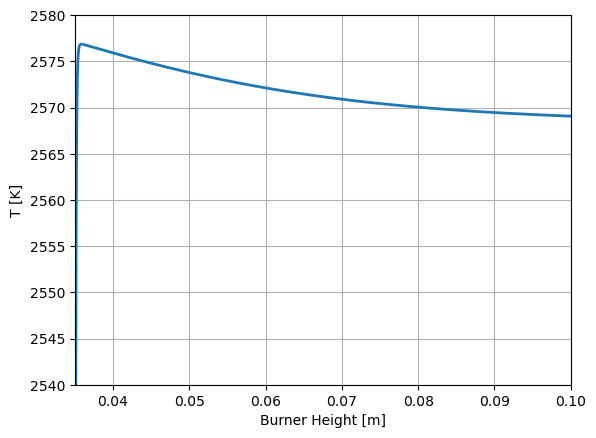

In [5]:
import cantera as ct
import timeit
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas as pd
import csv
import glob
import os

#mech = 'H2_new_mech.yaml' # without NOx
mech = 'Konnov_Han2021_dup_repairedfN2.yaml' # including NOx
'''
Han, Xinlu, Marco Lubrano Lavadera, and Alexander A. Konnov. 
"An experimental and kinetic modeling study on the laminar burning velocity of NH3+ N2O+ air flames." 
Combustion and Flame 228 (2021): 13-28.
'''

gas = ct.Solution(mech)

# Simulation parameters
Pressure = 15*ct.one_atm   # pressure [Pa]
Temperature = 500     # unburned gas temperature [K]   
phi = 1.0         # Equivalence ratio

# Solution
gas.TP = Temperature, Pressure
gas.set_equivalence_ratio(phi, 'H2:1.0', 'O2:1.0, N2:3.76') # Air
#gas.set_equivalence_ratio(phi, 'H2:1.0', 'N2O:1.0') # N2O


# Flame object
Laminar1Dflame = ct.FreeFlame(gas, width=0.1)
Laminar1Dflame.set_refine_criteria(ratio=3, slope=0.002, curve=0.002, prune=0.9*0.002)  # Ensuring 4000 grids
Laminar1Dflame.set_max_grid_points(Laminar1Dflame.flame, 1e4)
Laminar1Dflame.max_time_step_count = 1e6
Laminar1Dflame.transport_model = 'Multi'
Laminar1Dflame.soret_enabled = True
Laminar1Dflame.solve(loglevel=0, refine_grid=True, auto=False)

#print(Laminar1Dflame.T)
#print(Laminar1Dflame.grid)

# Plot
plt.plot(Laminar1Dflame.grid, Laminar1Dflame.T, lw=2)
plt.grid(True)
plt.xlabel("Burner Height [m]")
plt.ylabel("T [K]")
pylab.xlim(0.035, 0.1)
pylab.ylim(2540, 2580)